# A1
# Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

data = pd.read_csv(r"Iris.csv")

data.head()




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# A2
# Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results. 


The rmse score is 0.2581988897471611
The mse is 0.06666666666666667
the r2 score is 0.904610492845787
The MAPE is 7.5


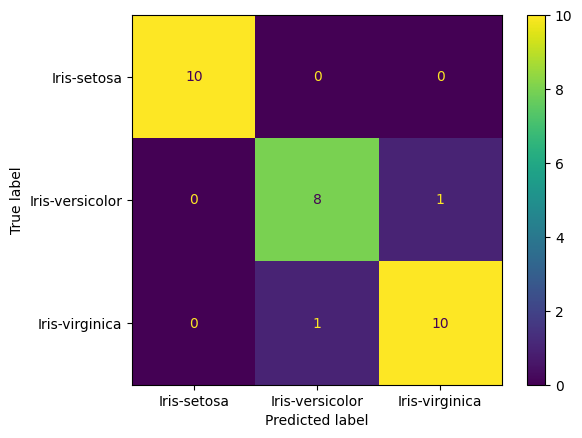

In [6]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm"]]

y =  LabelEncoder().fit_transform(data["Species"])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])

disp.plot()


from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

def calc_mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true),np.array(y_pred)
    non_zero_mask = y_true!=0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask])/y_true[non_zero_mask]))*100


print(f"The rmse score is {rmse}")
print(f"The mse is {mse}")
print(f"the r2 score is {r2}")
print(f"The MAPE is {calc_mape(y_test,y_pred)}")

# A3

Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - 
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.

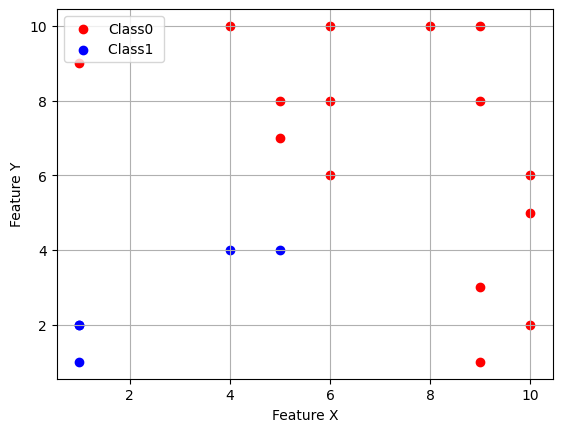

In [35]:
import random 
import numpy as np
import matplotlib.pyplot as plt

#making the classes

def data_gen():
    nums  = [[random.randint(1,10),random.randint(1,10)] for i in range(20)]

    #Divinding classes
    class0 = np.array([i for i in nums if i[0]+i[1]>=10])
    class1 = np.array([i for i in nums if i[0]+i[1]<10])
    return nums,class0,class1

def plotter(class0,class1):
#plotting portion
    plt.scatter(class0[:, 0], class0[:, 1], color="red", label='Class0')
    plt.scatter(class1[:, 0], class1[:, 1], color="blue", label='Class1 ')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)
    plt.legend()
    plt.show()

#main segment
data,arr1,arr2= data_gen()
plotter(arr1,arr2)






# A4
Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space.

In [ ]:
# from itertools import product
# import numpy as np 

# X= np.arange(0 , 10,0.1)
# Y = np.arange(0 , 10,0.1)
# cartesian_product = np.array(list(product(X, Y)))




# print("Shape:", cartesian_product.shape)

g
# # make a knn classifier 
# from sklearn.neighbors import KNeighborsClassifier

# data = list(arr1) + list(arr2)
# labels = [0]*len(arr1) + [1]*len(arr2)

# # Now train
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)


from itertools import product
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def generate_cartesian_product():
    X = np.arange(0, 10, 0.1)
    Y = np.arange(0, 10, 0.1)
    cartesian_product = np.array(list(product(X, Y)))
    print("Shape:", cartesian_product.shape)
    return cartesian_product

def prepare_data_labels(arr1, arr2):
    data = list(arr1) + list(arr2)
    labels = [0]*len(arr1) + [1]*len(arr2)
    return data, labels

def train_knn(data, labels, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(data, labels)
    return knn

def predict_points(knn, points, limit_print=10):
    predictions = knn.predict(points)
    for pt, pred in zip(points[:limit_print], predictions[:limit_print]):
        print(f"Predicted class for {pt} is: {pred}")
    return predictions


data,arr1,arr2= data_gen()

# Assume arr1 and arr2 are already defined numpy arrays of shape (n_samples, 2)
cartesian_product = generate_cartesian_product()
data, labels = prepare_data_labels(arr1, arr2)

knn = train_knn(data, labels, n_neighbors=3)
print("Predictions for k=3:")
predict_points(knn, cartesian_product)

# You can add more k values here:
# for k in [4, 5, 6]:
#     knn = train_knn(data, labels, n_neighbors=k)
#     print(f"Predictions for k={k}:")
#     predict_points(knn, cartesian_product)



Shape: (10000, 2)
Predictions for k=3:
Predicted class for [0. 0.] is: 1
Predicted class for [0.  0.1] is: 1
Predicted class for [0.  0.2] is: 1
Predicted class for [0.  0.3] is: 1
Predicted class for [0.  0.4] is: 1
Predicted class for [0.  0.5] is: 1
Predicted class for [0.  0.6] is: 1
Predicted class for [0.  0.7] is: 1
Predicted class for [0.  0.8] is: 1
Predicted class for [0.  0.9] is: 1


array([1, 1, 1, ..., 0, 0, 0])

# A5
#  Repeat A4 exercise for various values of k and observe the change in the class boundary lines.


In [1]:
# # Now train
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)
# # Now train
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)

# # Now train
# knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

def train_and_predict_knn(data, labels, cartesian_product, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, labels)
    for i in cartesian_product:
        prediction = knn.predict([i])
        print(f"Predicted class for {i} is: {prediction}")


df = pd.read_csv('Iris.csv')
c1 = df[df['Species'] == 'Iris-setosa'][['SepalLengthCm', 'PetalWidthCm']]
c2 = df[df['Species'] == 'Iris-versicolor'][['SepalLengthCm', 'PetalWidthCm']]
c3 = df[df['Species'] == 'Iris-virginica'][['SepalLengthCm', 'PetalWidthCm']]

data = list(c1.values) + list(c2.values) + list(c3.values)
labels = [0]*len(c1) + [1]*len(c2) + [2]*len(c3)

X = np.arange(0, 10, 0.1)
Y = np.arange(0, 10, 0.1)
cartesian_product = np.array(list(product(X, Y)))

for k in [5, 4, 6]:
    print(f"\n--- Training and predicting with k={k} ---")
    train_and_predict_knn(data, labels, cartesian_product, k)

# Uncomment the following line to run:
# main()



--- Training and predicting with k=5 ---
Predicted class for [0. 0.] is: [0]
Predicted class for [0.  0.1] is: [0]
Predicted class for [0.  0.2] is: [0]
Predicted class for [0.  0.3] is: [0]
Predicted class for [0.  0.4] is: [0]
Predicted class for [0.  0.5] is: [0]
Predicted class for [0.  0.6] is: [0]
Predicted class for [0.  0.7] is: [0]
Predicted class for [0.  0.8] is: [0]
Predicted class for [0.  0.9] is: [0]
Predicted class for [0. 1.] is: [0]
Predicted class for [0.  1.1] is: [0]
Predicted class for [0.  1.2] is: [0]
Predicted class for [0.  1.3] is: [0]
Predicted class for [0.  1.4] is: [0]
Predicted class for [0.  1.5] is: [0]
Predicted class for [0.  1.6] is: [0]
Predicted class for [0.  1.7] is: [0]
Predicted class for [0.  1.8] is: [0]
Predicted class for [0.  1.9] is: [0]
Predicted class for [0. 2.] is: [0]
Predicted class for [0.  2.1] is: [0]
Predicted class for [0.  2.2] is: [0]
Predicted class for [0.  2.3] is: [0]
Predicted class for [0.  2.4] is: [0]
Predicted clas

# A6
# Repeat the exercises A3 to A5 for your project data considering any two features and classes.

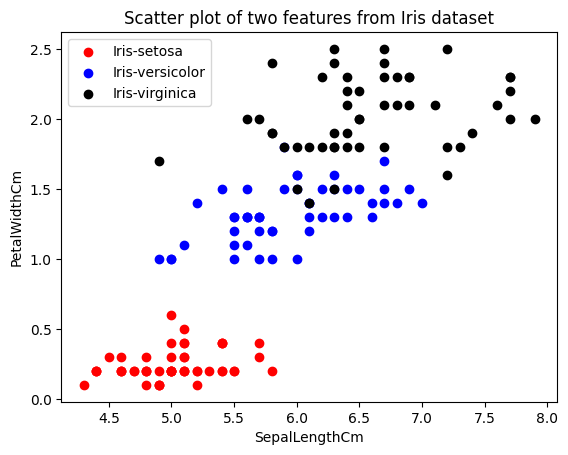

Shape: (10000, 2)
Training and predicting with k=3
Predicted class for [0. 0.] is: [0]
Predicted class for [0.  0.1] is: [0]
Predicted class for [0.  0.2] is: [0]
Predicted class for [0.  0.3] is: [0]
Predicted class for [0.  0.4] is: [0]
Predicted class for [0.  0.5] is: [0]
Predicted class for [0.  0.6] is: [0]
Predicted class for [0.  0.7] is: [0]
Predicted class for [0.  0.8] is: [0]
Predicted class for [0.  0.9] is: [0]
Predicted class for [0. 1.] is: [0]
Predicted class for [0.  1.1] is: [0]
Predicted class for [0.  1.2] is: [0]
Predicted class for [0.  1.3] is: [0]
Predicted class for [0.  1.4] is: [0]
Predicted class for [0.  1.5] is: [0]
Predicted class for [0.  1.6] is: [0]
Predicted class for [0.  1.7] is: [0]
Predicted class for [0.  1.8] is: [0]
Predicted class for [0.  1.9] is: [0]
Predicted class for [0. 2.] is: [0]
Predicted class for [0.  2.1] is: [0]
Predicted class for [0.  2.2] is: [0]
Predicted class for [0.  2.3] is: [0]
Predicted class for [0.  2.4] is: [0]
Predi

In [31]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product

# df = pd.read_csv('Iris.csv')

# c1,c2,c3 = [],[],[]
# c1 = df[df['Species'] == 'Iris-setosa'][['SepalLengthCm', 'PetalWidthCm']]
# c2 = df[df['Species'] == 'Iris-versicolor'][['SepalLengthCm', 'PetalWidthCm']]
# c3 = df[df['Species'] == 'Iris-virginica'][['SepalLengthCm', 'PetalWidthCm']]

        
# plt.scatter(c1['SepalLengthCm'], c1['PetalWidthCm'],label= 'Iris-setosa',color= 'Red')
# plt.scatter(c2['SepalLengthCm'], c2['PetalWidthCm'],label= 'Iris-versicolor',color= 'Blue')
# plt.scatter(c3['SepalLengthCm'], c3['PetalWidthCm'],label= 'Iris-virginica',color= 'Black')
# plt.xlabel('SepalLengthCm')
# plt.ylabel('PetalWidthCm')
# plt.title('Scatter plot of two features from Iris dataset')
# plt.legend()
# plt.show()

# X= np.arange(0 , 10,0.1)
# Y = np.arange(0 , 10,0.1)
# cartesian_product = np.array(list(product(X, Y)))




# print("Shape:", cartesian_product.shape)


# # make a knn classifier 
# from sklearn.neighbors import KNeighborsClassifier

# data = list(c1.values) + list(c2.values) + list(c3.values)
# labels = [0]*len(c1) + [1]*len(c2) + [2]*len(c3)

# # Now train
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)


# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)


# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)

# knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(data, labels)



# for i in cartesian_product: 
#     #print(i)
#     prediction = knn.predict([i])
#     print("Predicted class for", i, "is:", prediction)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

def plot_scatter(c1, c2, c3):
    plt.scatter(c1['SepalLengthCm'], c1['PetalWidthCm'], label='Iris-setosa', color='Red')
    plt.scatter(c2['SepalLengthCm'], c2['PetalWidthCm'], label='Iris-versicolor', color='Blue')
    plt.scatter(c3['SepalLengthCm'], c3['PetalWidthCm'], label='Iris-virginica', color='Black')
    plt.xlabel('SepalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title('Scatter plot of two features from Iris dataset')
    plt.legend()
    plt.show()

def generate_cartesian_product():
    X = np.arange(0, 10, 0.1)
    Y = np.arange(0, 10, 0.1)
    cartesian_product = np.array(list(product(X, Y)))
    print("Shape:", cartesian_product.shape)
    return cartesian_product

def prepare_data_and_labels(c1, c2, c3):
    data = list(c1.values) + list(c2.values) + list(c3.values)
    labels = [0]*len(c1) + [1]*len(c2) + [2]*len(c3)
    return data, labels

def train_and_predict_knn(data, labels, cartesian_product, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, labels)
    for i in cartesian_product:
        prediction = knn.predict([i])
        print("Predicted class for", i, "is:", prediction)


df = pd.read_csv('Iris.csv')
c1 = df[df['Species'] == 'Iris-setosa'][['SepalLengthCm', 'PetalWidthCm']]
c2 = df[df['Species'] == 'Iris-versicolor'][['SepalLengthCm', 'PetalWidthCm']]
c3 = df[df['Species'] == 'Iris-virginica'][['SepalLengthCm', 'PetalWidthCm']]

plot_scatter(c1, c2, c3)
cartesian_product = generate_cartesian_product()
data, labels = prepare_data_and_labels(c1, c2, c3)

for k in [3, 4, 5, 6]:
    print(f"Training and predicting with k={k}")
    train_and_predict_knn(data, labels, cartesian_product, k)

# Uncomment the next line to run the main function
# main()





# A7
# Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning. 

In [37]:
import numpy as np

# Combine class data as arrays
data = np.vstack((c1.values, c2.values, c3.values))
labels = np.array([0]*len(c1) + [1]*len(c2) + [2]*len(c3))


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define ranges of k to try
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()

# 5-fold cross-validation to select best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(data, labels)

# Extract best k and validation accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Best k:", best_k)
print("Best cross-validated accuracy:", round(best_score, 2))


Best k: 4
Best cross-validated accuracy: 0.96
